In [1]:
import networkx as nx
import matplotlib.pyplot as plt

How many nodes in the graph? 6
How many edges between A and B? 1
How many edges between A and C? 0
How many edges between A and D? 1
How many edges between A and E? 1
How many edges between A and F? 0
How many edges between B and C? 1
How many edges between B and D? 1
How many edges between B and E? 0
How many edges between B and F? 1
How many edges between C and D? 0
How many edges between C and E? 1
How many edges between C and F? 0
How many edges between D and E? 1
How many edges between D and F? 1
How many edges between E and F? 1
current graph
   A B C D E F
A  0 1 0 1 1 0
B  1 0 1 1 0 1
C  0 1 0 0 1 0
D  1 1 0 0 1 1
E  1 0 1 1 0 1
F  0 1 0 1 1 0


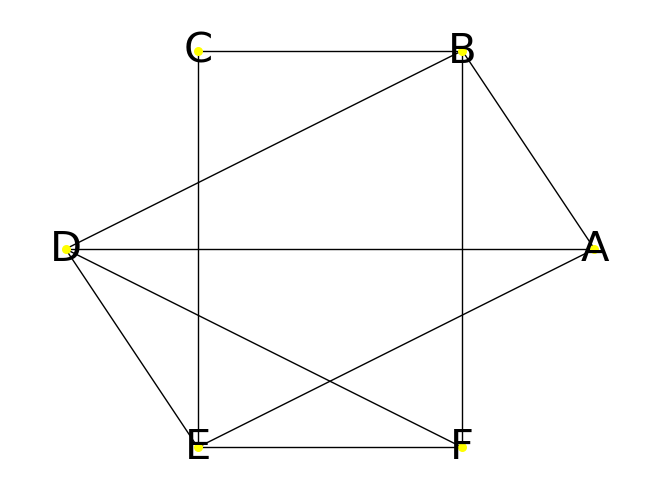

['A', 'B', 'C', 'E', 'D', 'F', 'E', 'A', 'D', 'B', 'F']


In [ ]:
def manually_create_matrix():
    num_nodes = int(input("How many nodes in the graph? "))
    graph_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            while True:
                try:
                    edges = int(input(f"How many edges between {chr(ord('A')+i)} and {chr(ord('A')+j)}? "))
                    graph_matrix[i][j] = edges
                    graph_matrix[j][i] = edges
                    break
                except ValueError:
                    print("Invalid input. Try again.")
        # Print the matrix in a visually appealing way
    print('current graph')
    print("   " + " ".join(f"{chr(ord('A')+i)}" for i in range(num_nodes)))
    for i in range(num_nodes):
        print(f"{chr(ord('A')+i)}  " + " ".join(f"{graph_matrix[i][j]}" for j in range(num_nodes)))
    return graph_matrix


def find_odd_degree_vertices(graph_matrix):
    odd_row_list = []
    for i in range(len(graph_matrix)):
        if sum(graph_matrix[i])%2 != 0:
            odd_row_list.append(chr(ord('A')+i))
    return odd_row_list
                                
def check_valid_graph(graph_matrix, odd_row_list):
    if len(odd_row_list) % 2 == 1:
        print("Invalid graph matrix.  This graph doesn't exist.")
        raise ValueError("Invalid graph matrix.  This graph doesn't exist.")
    elif len(odd_row_list) > 2:
        print("More than two vertices of odd degree.  No trail possible")
        raise ValueError("More than two vertices of odd degree.  No trail possible")
    else:
        num_rows = len(graph_matrix)
        num_cols = len(graph_matrix[0])
        if num_rows != num_cols:
            raise ValueError("Non-square matrix supplied")
    return

def create_graph(graph_matrix):
    new_graph = nx.Graph()
    for i in range(len(graph_matrix)):
        new_graph.add_node(chr(ord('A') + i))
    for i in range(len(graph_matrix) - 1):
        for j in range((i + 1), len(graph_matrix)):
            num_edges = graph_matrix[i][j]
            for _ in range(num_edges):
                new_graph.add_edge(chr(ord('A')+i), chr(ord('A')+j))
    return new_graph

def build_trail(odd_row_list, old_graph):
    try:
        begin = odd_row_list[0]
    except:
        begin = 'A'
    try:
        end = odd_row_list[-1]
    except:
        end = 'A'
    path = insert_loop(old_graph, begin, end)
    for node1, node2 in zip(path[:-1], path[1:]):
        if old_graph.has_edge(node1, node2):
            old_graph.remove_edge(node1, node2)
    while len(old_graph.edges()) > 0:
        for node in path:
            if len(list(old_graph.neighbors(node))) > 0:
                new_loop = insert_loop(old_graph, node)
                path = path[:path.index(node)] + new_loop + path[path.index(node) + 1:]
    return path

def insert_loop(old_graph, begin, end=None):
    path_1 = [begin]
    current_node = begin
    while True:
        neighbors = list(old_graph.neighbors(current_node))
        if len(neighbors) == 0:
            break
        next_node = neighbors[0]
        path_1.append(next_node)
        if old_graph.has_edge(current_node, next_node):
            old_graph.remove_edge(current_node, next_node)
        current_node = next_node
        if current_node == end:
            break
    return path_1

while True:
    graph_matrix = manually_create_matrix()
    odd_row_list = find_odd_degree_vertices(graph_matrix)
    try:
        check_valid_graph(graph_matrix, odd_row_list)
    except:
        print("Invalid graph provided")
        continue
    graph = create_graph(graph_matrix)
    nx.draw_circular(graph,
            with_labels=True, 
            font_size=30, 
            node_size=30, 
            node_color = 'yellow')
    plt.show()
    path = build_trail(odd_row_list, graph)
    print(path)